## Observations and Insights

## Dependencies and starter code

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [30]:
# Combine the data into a single dataset

combined_df=pd.merge(mouse_metadata,study_results,on="Mouse ID")

#rearrange column name and format decimal for "Tumor Volume (mm3)" column
combined_pharma_df=combined_df[["Mouse ID", "Timepoint","Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", 
                                "Sex", "Age_months", "Weight (g)"]]

combined_pharma_df["Tumor Volume (mm3)"]=combined_pharma_df["Tumor Volume (mm3)"].map("{:.1f}".format)
combined_pharma_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
1,k403,5,38.8,0,Ramicane,Male,21,16
2,k403,10,35.0,1,Ramicane,Male,21,16
3,k403,15,34.2,1,Ramicane,Male,21,16
4,k403,20,33.0,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.1,2,Naftisol,Male,9,30
1889,z969,30,65.8,3,Naftisol,Male,9,30
1890,z969,35,69.2,4,Naftisol,Male,9,30
1891,z969,40,70.3,4,Naftisol,Male,9,30


## Summary statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [32]:
#group by drug_regimen and show summary statsitics
drug_regimen_df=combined_df.groupby(["Drug Regimen"])

mean_tumorvolume=drug_regimen_df["Tumor Volume (mm3)"].mean()
median_tumorvolume=drug_regimen_df["Tumor Volume (mm3)"].median()
variance_tumorvolume=drug_regimen_df["Tumor Volume (mm3)"].var()
stdev_tumorvolume=drug_regimen_df["Tumor Volume (mm3)"].std()
stderror_tumorvolume=drug_regimen_df["Tumor Volume (mm3)"].sem() 

In [33]:
#create new dataframe
statistics_tumorvolume_df=pd.DataFrame({"Mean Tumor Volume":mean_tumorvolume,
                          "Median Tumor Volume":median_tumorvolume,
                          "Tumor Volume Variance" : variance_tumorvolume,
                         "Tumor Volume Std. Dev.":stdev_tumorvolume,
                           "Tumor Volume Std. Err": stderror_tumorvolume
                                       })
                                       
statistics_tumorvolume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
#rename column header
statistics_tumorvolume_rename=statistics_tumorvolume_df.rename(columns={"Mean Tumor Volume":"mean",
                          "Median Tumor Volume":"median",
                          "Tumor Volume Variance" : "var",
                         "Tumor Volume Std. Dev.":"std",
                           "Tumor Volume Std. Err": "sem"
                                       })
                                       
statistics_tumorvolume_rename

#add title for dataframe

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [79]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#create dataframe for number of data points per drug regimen
datapoints_drug_regimen=drug_regimen_df["Mouse ID"].count()

datapoints_drug_regimen_df=pd.DataFrame({"Count":datapoints_drug_regimen})


#sort_df=datapoints_drug_regimen_df.sort(["Count"], ascending=False)

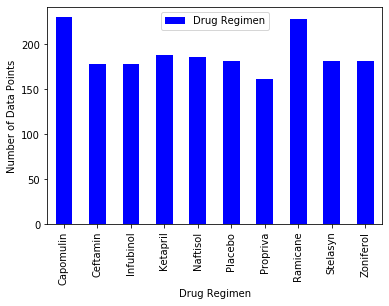

In [57]:
datapoints_drug_regimen_df.plot(kind="bar",facecolor="blue")

plt.ylabel("Number of Data Points")

plt.show()

In [61]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis=np.arange(len(datapoints_drug_regimen))

datapoints_drug_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [38]:
#label of bars from list of drug regimen
statistics_tumorvolume_rename.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

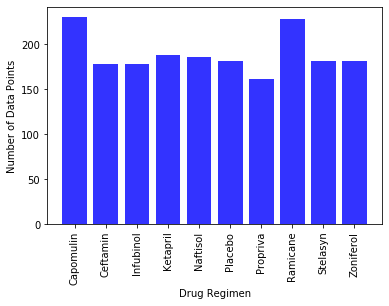

In [58]:
#create bar plot with pyplot
plt.bar(x_axis,datapoints_drug_regimen,color='b',alpha=0.8,align="center")

#add x and y label
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

#tick locations
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,statistics_tumorvolume_rename.index,rotation="vertical")
plt.show()

## Pie plots

In [40]:
#count for male and female. counts() create an object that store the keys with its values
mouse_sex_value=combined_pharma_df["Sex"].value_counts()


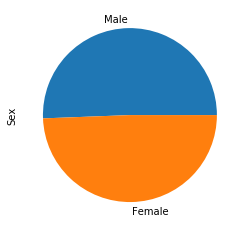

In [41]:
#create pie chart plot from pandas

mouse_sex_pie=mouse_sex_value.plot(kind="pie")


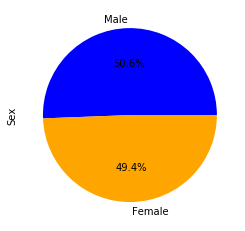

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#pie plot properties
explode=(0,0)
colors=["blue","orange"]

labels=combined_df["Sex"].unique().tolist()

plt.ylabel("Sex")

plt.pie(mouse_sex_value,explode=explode,labels=labels,colors=colors,
        autopct="%1.1f%%" ,shadow=False,startangle=0)
plt.show()

## Quartiles, outliers and boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.

#create dataframe based on maximum final days of mouse

max_mouse=combined_df.groupby(["Mouse ID"]).max()
max_mouse=max_mouse.reset_index()

#combine data of final days with the original dataframe
mouse_combined=max_mouse[["Mouse ID","Timepoint"]].merge(combined_df,on=["Mouse ID","Timepoint"])

In [44]:
#select data for each 4 drugs

capomuline=mouse_combined.loc[mouse_combined["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]

ramicane=mouse_combined.loc[mouse_combined["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]

infubinol=mouse_combined.loc[mouse_combined["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]

ceftamin=mouse_combined.loc[mouse_combined["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]

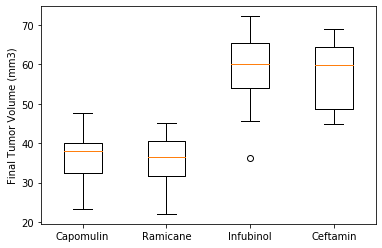

In [45]:
#create boxplot for the 4 drugs
data=capomuline,ramicane,infubinol,ceftamin



fig1, ax1 = plt.subplots()
ax1.boxplot(data)

plt.ylabel("Final Tumor Volume (mm3)")

plt.xticks([1, 2, 3,4], ['Capomulin','Ramicane','Infubinol','Ceftamin'])



plt.show()

In [46]:
#Calculate IQR
#quartiles and outliers for capomuline
quartiles = capomuline.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capomuline is: {lowerq}")
print(f"The upper quartile of capomuline is: {upperq}")
print(f"The interquartile range of capomuline is: {iqr}")
print(f"The the median of capomuline is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of capomuline is: 32.37735684
The upper quartile of capomuline is: 40.1592203
The interquartile range of capomuline is: 7.781863460000004
The the median of capomuline is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [47]:
#quartiles and outliers for ramicane
quartiles2 = ramicane.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

print(f"The lower quartile of ramicane is: {lowerq2}")
print(f"The upper quartile of ramicane is: {upperq2}")
print(f"The interquartile range of ramicane is: {iqr2}")
print(f"The the median of ramicane is: {quartiles2[0.5]} ")

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

#ceftamine

The lower quartile of ramicane is: 31.56046955
The upper quartile of ramicane is: 40.65900627
The interquartile range of ramicane is: 9.098536719999998
The the median of ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [48]:
#quartiles and outliers for infubinol
quartiles3 = infubinol.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

print(f"The lower quartile of infubinol is: {lowerq3}")
print(f"The upper quartile of infubinol is: {upperq3}")
print(f"The interquartile range of infubinol is: {iqr3}")
print(f"The the median of infubinol is: {quartiles2[0.5]} ")

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Values below {lower_bound3} could be outliers.")
print(f"Values above {upper_bound3} could be outliers.")

The lower quartile of infubinol is: 54.04860769
The upper quartile of infubinol is: 65.52574285
The interquartile range of infubinol is: 11.477135160000003
The the median of infubinol is: 36.56165229 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [49]:
#quartiles and outliers for ceftamin
quartiles4 = ceftamin.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq-lowerq

print(f"The lower quartile of ceftamin is: {lowerq4}")
print(f"The upper quartile of ceftamin is: {upperq4}")
print(f"The interquartile range of ceftamin is: {iqr4}")
print(f"The the median of ceftamin is: {quartiles2[0.5]} ")

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Values below {lower_bound4} could be outliers.")
print(f"Values above {upper_bound4} could be outliers.")

The lower quartile of ceftamin is: 48.72207785
The upper quartile of ceftamin is: 64.29983003
The interquartile range of ceftamin is: 7.781863460000004
The the median of ceftamin is: 36.56165229 
Values below 37.04928265999999 could be outliers.
Values above 75.97262522 could be outliers.


## Line and scatter plots

In [81]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


capomulin=combined_pharma_df.loc[combined_pharma_df["Drug Regimen"]=="Capomulin"]


select_l509=capomulin.loc[capomulin["Mouse ID"] == "l509"]
select_l509.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
371,l509,0,45.0,0,Capomulin,Male,17,21
372,l509,5,45.9,0,Capomulin,Male,17,21
373,l509,10,46.8,0,Capomulin,Male,17,21
374,l509,15,47.5,1,Capomulin,Male,17,21
375,l509,20,48.1,2,Capomulin,Male,17,21


In [99]:
#declare x axis is timepoint and y axis is Tumor Volume
timepoint_list=select_l509["Timepoint"].tolist()
tumor_volume_list=select_l509["Tumor Volume (mm3)"]

tumor_volume_sorted=tumor_volume_list.sort_values.(ascending=True)

SyntaxError: invalid syntax (<ipython-input-99-ef5598c3475a>, line 5)

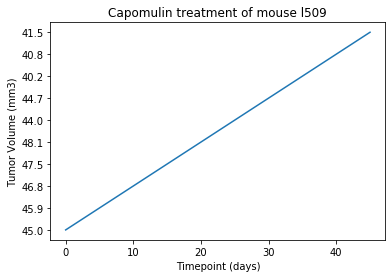

In [90]:
#create line plot
plt.plot(timepoint_list,tumor_volume_list)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show() 

In [53]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#combine mouse with capomulin and find the mean value
capomulin=combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]
groupbymouse=capomulin.groupby(["Mouse ID"]).mean()

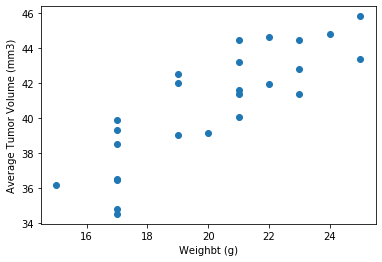

In [54]:
#create a scatter plot for weight in capomulin treatment
weight = groupbymouse["Weight (g)"]
tumor_volume = groupbymouse["Tumor Volume (mm3)"]

plt.scatter(weight,tumor_volume)

plt.xlabel("Weighbt (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The coefficient correlation is: 0.84


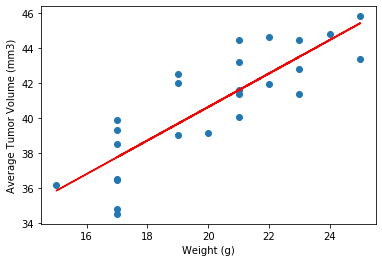

In [55]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#define the x, y, and correlation
weight = groupbymouse["Weight (g)"]
tumor_volume = groupbymouse["Tumor Volume (mm3)"]
correlation=st.pearsonr(weight,tumor_volume)


(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor_volume)
plt.plot(weight,regress_values,"r-")
#plt.(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The coefficient correlation is: {round(correlation[0],2)}")
plt.show()

In [56]:
#Three Observation
#1) In this observation, capomuline and ramicane have the highest data points while propriva has the lowest data points of 
#observation. 
#2) Capomuline and Ramicane have better effect in treating the tumor. The final tumor volume on mouse treated by 
#those 2 drugs is lower that treated by infubinol and cetamin. 
#3) Average tumor volume and average weight of mouse has a positive correlation